In [1]:
import numpy as np
from util import get_data
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt

In [44]:
# get price of JPM
window = 14
prices = get_data(["JPM"], pd.date_range(pd.to_datetime("2008-01-01") - dt.timedelta(window*2), "2009-12-31"))
print(prices)

               SPY    JPM
2007-12-04  132.75  39.92
2007-12-05  134.97  40.60
2007-12-06  136.90  41.78
2007-12-07  136.88  41.67
2007-12-10  137.94  42.88
...            ...    ...
2009-12-24  107.46  39.91
2009-12-28  107.69  39.75
2009-12-29  107.54  39.53
2009-12-30  107.50  39.57
2009-12-31  106.47  39.70

[524 rows x 2 columns]


               SPY    JPM
2007-12-04  132.75  39.92
2007-12-05  134.97  40.60
2007-12-06  136.90  41.78
2007-12-07  136.88  41.67
2007-12-10  137.94  42.88
...            ...    ...
2009-12-24  107.46  39.91
2009-12-28  107.69  39.75
2009-12-29  107.54  39.53
2009-12-30  107.50  39.57
2009-12-31  106.47  39.70

[524 rows x 2 columns]
                   SPY        JPM
2008-01-02  133.962143  40.034286
2008-01-03  133.720000  39.782143
2008-01-04  133.266429  39.492857
2008-01-07  132.927143  39.267143
2008-01-08  132.575714  38.977857
...                ...        ...
2009-12-24  105.741429  39.360714
2009-12-28  105.910000  39.392857
2009-12-29  106.151429  39.412143
2009-12-30  106.362143  39.435714
2009-12-31  106.457143  39.462857

[505 rows x 2 columns]


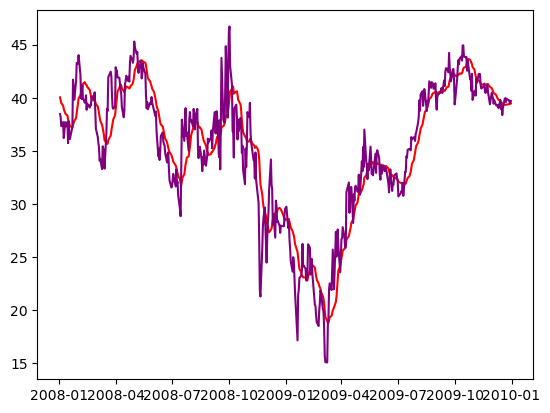

In [45]:
def get_sma(window, prices, sd):
    sma = prices.rolling(window).mean()
    return sma.loc[sd:]

date_range = pd.date_range("2008-01-01", "2009-12-31")
sma = get_sma(window, prices, date_range[0])
print(sma)

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(sma.loc[:, "JPM"], color = "red")
ax.plot(prices.loc[date_range[0]:, "JPM"], color = "purple")
plt.show()

               SPY    JPM
2007-12-04  132.75  39.92
2007-12-05  134.97  40.60
2007-12-06  136.90  41.78
2007-12-07  136.88  41.67
2007-12-10  137.94  42.88
...            ...    ...
2009-12-24  107.46  39.91
2009-12-28  107.69  39.75
2009-12-29  107.54  39.53
2009-12-30  107.50  39.57
2009-12-31  106.47  39.70

[524 rows x 2 columns]
                 SPY       JPM
2007-12-04       NaN       NaN
2007-12-05       NaN       NaN
2007-12-06       NaN       NaN
2007-12-07       NaN       NaN
2007-12-10       NaN       NaN
...              ...       ...
2009-12-24  0.923971  0.497472
2009-12-28  0.978056  0.499084
2009-12-29  1.011796  0.446666
2009-12-30  1.074447  0.412771
2009-12-31  1.078691  0.400532

[524 rows x 2 columns]


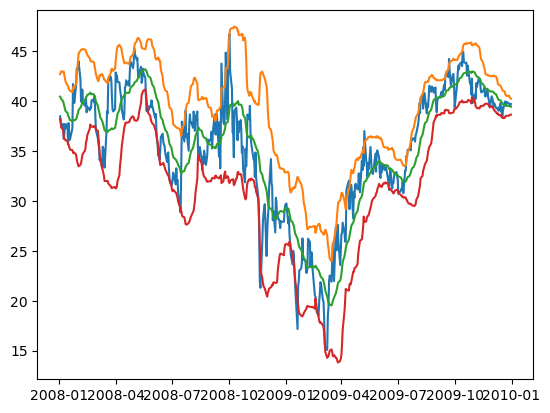

2008-01-02    0.060962
2008-01-03    0.060414
2008-01-04   -0.011857
2008-01-07    0.107090
2008-01-08   -0.040622
                ...   
2009-12-24    0.698755
2009-12-28    0.608699
2009-12-29    0.524907
2009-12-30    0.570863
2009-12-31    0.661972
Name: JPM, Length: 505, dtype: float64


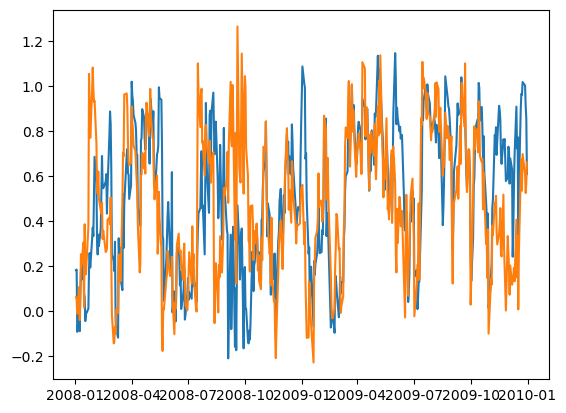

In [57]:
window = 20

def get_bbp(window, prices, sd):
    sma = get_sma(window, prices, sd)
    std = prices.rolling(window).std()
    print(std)
    sd_delta = 2*std
    upper_band = sma + sd_delta
    lower_band = sma - sd_delta

    fig = plt.figure()
    ax = fig.add_subplot()
    ax.plot(prices.loc[date_range[0]:, "JPM"])
    ax.plot(upper_band.loc[:, "JPM"])
    ax.plot(sma.loc[:,"JPM"])
    ax.plot(lower_band.loc[:,"JPM"])
    plt.show()
    plt.close()

    bbp = (prices - lower_band)/(upper_band - lower_band)
    return bbp.loc[sd:]

bbp = get_bbp(window, prices, date_range[0])
print(bbp.loc[:,"JPM"])

plt.plot(bbp)

In [262]:
def daily_change(symbol, date_range, window):
    prices = get_data([symbol], pd.date_range(date_range[0],date_range[-1] + dt.timedelta(window*2)))
    # print(prices)
    dc = prices - prices.shift(1)
    return dc.loc[date_range[0], symbol]

dc = daily_change("JPM", date_range, 14)
print(dc)

KeyError: Timestamp('2008-01-01 00:00:00', freq='D')

In [261]:
def get_rsi(symbol, date_range, window):
    dc = daily_change(symbol, pd.date_range(date_range[0]-dt.timedelta(2*window), date_range[-1]+dt.timedelta(2*window)), window)
    # print(dc)
    gain = dc.clip(lower=0) #https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.clip.html
    loss = dc.clip(upper=0) #https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.clip.html

    # print(gain)
    # print(loss)

    avg_gain = gain.rolling(window).mean()
    avg_loss = loss.rolling(window).mean().abs()

    # print(avg_gain.loc[date_range[0]:date_range[-1]])
    # print(avg_loss.loc[date_range[0]:date_range[-1]])

    rsi = 100 - (100/(1 + (avg_gain/avg_loss)))
    rsi[rsi == np.inf] = 100
    print(rsi.loc[date_range[0]:date_range[-1], symbol])

    return rsi.loc[date_range[0]:date_range[-1], symbol]

get_rsi("JPM", date_range, 14)

               SPY    JPM
2007-12-04  132.75  39.92
2007-12-05  134.97  40.60
2007-12-06  136.90  41.78
2007-12-07  136.88  41.67
2007-12-10  137.94  42.88
...            ...    ...
2010-02-19  106.18  38.18
2010-02-22  106.20  38.97
2010-02-23  104.91  38.04
2010-02-24  105.88  38.97
2010-02-25  105.73  38.77

[561 rows x 2 columns]


ValueError: One of max or min must be given

In [176]:
prices_master = get_data(["JPM"], pd.date_range(pd.to_datetime("2007-09-01"), pd.to_datetime("2010-03-01")))
market_days = prices_master.index.tolist()

np.sort(market_days)


array([Timestamp('2007-09-04 00:00:00'), Timestamp('2007-09-05 00:00:00'),
       Timestamp('2007-09-06 00:00:00'), Timestamp('2007-09-07 00:00:00'),
       Timestamp('2007-09-10 00:00:00'), Timestamp('2007-09-11 00:00:00'),
       Timestamp('2007-09-12 00:00:00'), Timestamp('2007-09-13 00:00:00'),
       Timestamp('2007-09-14 00:00:00'), Timestamp('2007-09-17 00:00:00'),
       Timestamp('2007-09-18 00:00:00'), Timestamp('2007-09-19 00:00:00'),
       Timestamp('2007-09-20 00:00:00'), Timestamp('2007-09-21 00:00:00'),
       Timestamp('2007-09-24 00:00:00'), Timestamp('2007-09-25 00:00:00'),
       Timestamp('2007-09-26 00:00:00'), Timestamp('2007-09-27 00:00:00'),
       Timestamp('2007-09-28 00:00:00'), Timestamp('2007-10-01 00:00:00'),
       Timestamp('2007-10-02 00:00:00'), Timestamp('2007-10-03 00:00:00'),
       Timestamp('2007-10-04 00:00:00'), Timestamp('2007-10-05 00:00:00'),
       Timestamp('2007-10-08 00:00:00'), Timestamp('2007-10-09 00:00:00'),
       Timestamp('2007-10

In [200]:
sd = pd.to_datetime("2008-01-01")
ed = pd.to_datetime("2009-12-31")
date_range = pd.date_range(sd, ed)
window = 14
symbol = "JPM"

def get_ema(symbol, date_range, window):
    sd = date_range[0]
    ed = date_range[-1]
    prices_ema = get_data([symbol], market_days[market_days.index(sd)-14:])
    return prices_ema.ewm(span=window, adjust=False).mean().loc[date_range[0]:]

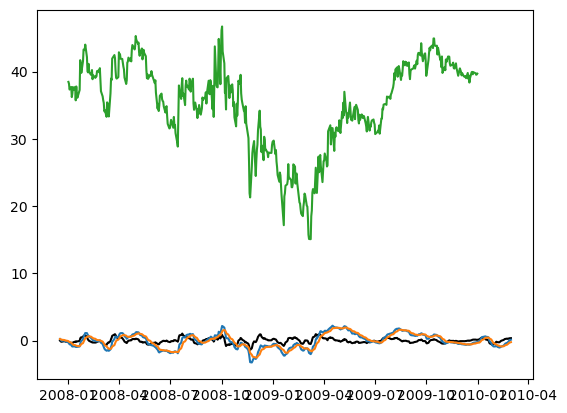

In [186]:
def get_macd(symbol, date_range):
    sd = date_range[0]
    ed = date_range[-1]
    fast_ema = get_ema(symbol, market_days[market_days.index(sd)-9:], 12)
    slow_ema = get_ema(symbol, market_days[market_days.index(sd)-9:], 26)
    macd = fast_ema - slow_ema
    signal = macd.ewm(span=9, adjust=False).mean()
    macd = macd.loc[:, "JPM"]
    signal = signal.loc[:, "JPM"]
    histogram = macd - signal

    return histogram

In [191]:
def get_roc(date_range, window):
    prices = prices_master.loc[market_days[market_days.index(date_range[0]) - window]:]
    return (prices/prices.shift(window) - 1)*100

get_roc(date_range, 10)

,SPY,JPM
2007-12-17,NaN,NaN
2007-12-18,NaN,NaN
2007-12-19,NaN,NaN
2007-12-20,NaN,NaN
2007-12-21,NaN,NaN
...,...,...
2010-02-23,3.696748,5.784205
2010-02-24,3.358063,6.417258
2010-02-25,3.413537,4.557713
2010-02-26,2.410222,7.549704


In [193]:
percentage_price_oscillator = get_ema(symbol, date_range, 9)/get_ema(symbol, date_range, 26) - 1

percentage_price_oscillator

,SPY,JPM
2008-01-02,-0.001247,-0.020118
2008-01-03,-0.002816,-0.023082
2008-01-04,-0.007002,-0.027746
2008-01-07,-0.010124,-0.029629
2008-01-08,-0.014291,-0.035476
...,...,...
2010-02-23,0.000115,-0.006223
2010-02-24,0.001239,-0.002753
2010-02-25,0.001873,-0.000805
2010-02-26,0.002397,0.004769


In [250]:
prices_master = get_data([symbol], pd.date_range(date_range[0]-dt.timedelta(90), date_range[-1]+dt.timedelta(90)))
sd = dt.datetime(2008,1,1)
ed = dt.datetime(2009,12,31)

market_days = prices_master.index
while sd not in market_days:
    sd = sd + dt.timedelta(1)

while ed not in market_days:
    ed = ed - dt.timedelta(1)

ed


datetime.datetime(2009, 12, 31, 0, 0)

In [258]:
window=10
prices = prices_master.loc[market_days[market_days.get_loc(sd)-window+1]:]
prices.rolling(10).mean()

,SPY,JPM
2007-12-18,NaN,NaN
2007-12-19,NaN,NaN
2007-12-20,NaN,NaN
2007-12-21,NaN,NaN
2007-12-24,NaN,NaN
...,...,...
2010-03-25,111.301,41.832
2010-03-26,111.408,42.010
2010-03-29,111.583,42.181
2010-03-30,111.677,42.308
